In [ ]:
#Imporing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
#Loading the data
diabetes_data = pd.read_excel('Diabetes_Data.xlsx')

In [ ]:
diabetes_data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
#correlation matrix
explanatory_variables = diabetes_data.drop(columns=['Y'])
correlation_matrix = explanatory_variables.corr()
correlation_matrix


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


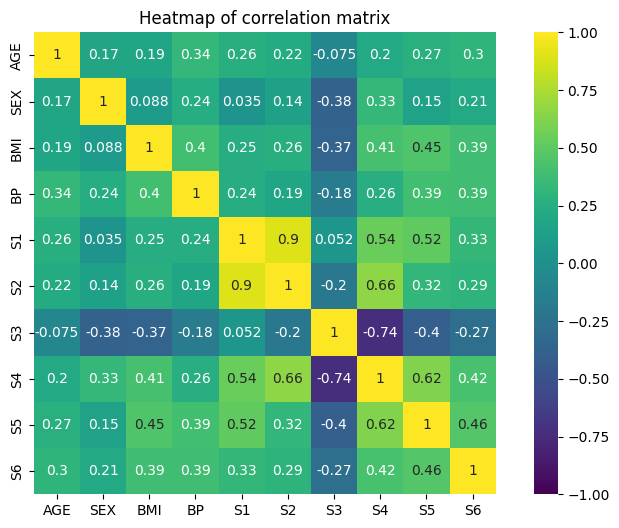

In [ ]:
#Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, square=True)
plt.title('Heatmap of correlation matrix')
plt.show()

In [ ]:
X = diabetes_data[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
Y = diabetes_data['Y']

In [ ]:
X_const = sm.add_constant(X)

In [ ]:
model1 = sm.OLS(Y, X_const).fit()

In [ ]:
prediction = model1.predict(X_const)

In [ ]:
MSE = mean_squared_error(Y, prediction)
R2 = model1.rsquared_adj

print('Mean squared error:', MSE)
print('R_squared:', R2)

Mean squared error: 2859.6963475867506
R_squared: 0.5065592904853231


In [ ]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           3.83e-62
Time:                        21:33:25   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.0

In [ ]:
print('p-values:',model1.pvalues)

p-values: const    1.016617e-06
AGE      8.670306e-01
SEX      1.041671e-04
BMI      4.296391e-14
BP       1.024278e-06
S1       5.794761e-02
S2       1.603902e-01
S3       6.347233e-01
S4       2.734587e-01
S5       1.555899e-05
S6       3.059895e-01
dtype: float64


In [ ]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included
selected_features = forward_regression(X, Y, 0.05)

In [ ]:
selected_features

['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']

In [ ]:
selected_const = sm.add_constant(X[selected_features])

new_model = sm.OLS(Y, selected_const).fit()

new_prediction = new_model.predict(selected_const)

mse = mean_squared_error(Y, new_prediction)

r2 = new_model.rsquared_adj

print('Root mean square error for the new model:', mse)
print('R square for the new model:', r2)

Root mean square error for the new model: 2876.683251787016
R square for the new model: 0.508192537938412


In [ ]:
#Loading the data
titanic_dataset = pd.read_csv('titanic3.csv')

In [ ]:
titanic_dataset.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [ ]:
probability_of_survival = titanic_dataset['survived'].mean()
print('Probability of survival:', probability_of_survival)

Probability of survival: 0.3819709702062643


In [ ]:
titanic_dataset = titanic_dataset.dropna(subset=['survived', 'age'])
age_ranges = [0, 12, 18, 35, 60, 90]
group_labels = ['child', 'teenager', 'youth','adult', 'old' ]

titanic_dataset['age_group'] = pd.cut(titanic_dataset['age'], bins=age_ranges, labels = group_labels)

table = titanic_dataset.groupby(['pclass', 'sex', 'age_group'], observed=True)['survived'].mean()

print(table)

pclass  sex     age_group
1       female  child        0.000000
                teenager     1.000000
                youth        0.981132
                adult        0.967213
                old          0.833333
        male    child        1.000000
                teenager     0.500000
                youth        0.431818
                adult        0.321429
                old          0.066667
2       female  child        1.000000
                teenager     0.875000
                youth        0.896552
                adult        0.833333
        male    child        1.000000
                teenager     0.000000
                youth        0.112360
                adult        0.023810
                old          0.166667
3       female  child        0.466667
                teenager     0.607143
                youth        0.464789
                adult        0.318182
                old          1.000000
        male    child        0.342857
                teenager

<ipython-input-19-2d15f343a03c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_dataset['age_group'] = pd.cut(titanic_dataset['age'], bins=age_ranges, labels = group_labels)


In [ ]:
titanic_dataset_cleaned = titanic_dataset.dropna(subset=['pclass', 'sex', 'age'])
titanic_dataset_cleaned['sex'] = titanic_dataset_cleaned['sex'].map({'male': 0, 'female': 1})


x = titanic_dataset_cleaned[['pclass', 'sex', 'age']]
x_const = sm.add_constant(x)
y = titanic_dataset_cleaned['survived']

x_train, x_test, y_train, y_test = train_test_split(x_const, y, test_size=0.2, random_state=42)

logistic_model = sm.Logit(y_train, x_train).fit()

print(logistic_model.summary())


Optimization terminated successfully.
         Current function value: 0.451298
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  836
Model:                          Logit   Df Residuals:                      832
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.3307
Time:                        18:07:35   Log-Likelihood:                -377.29
converged:                       True   LL-Null:                       -563.68
Covariance Type:            nonrobust   LLR p-value:                 1.741e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1285      0.419      5.074      0.000       1.306       2.951
pclass        -1.1628      0.

In [ ]:
y_prediction = logistic_model.predict(x_test)
prediction_to_binary = (y_prediction >= 0.5).astype(int)

c_matrix = confusion_matrix(y_test, prediction_to_binary)

accuracy = accuracy_score(y_test, prediction_to_binary)

print("Confusion Matrix:")
print(c_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[96 24]
 [31 59]]

Accuracy: 0.7380952380952381


In [ ]:
#Explicitly computing accuracy using confusion matrix
TN, FP, FN, TP = c_matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7380952380952381
